	Out‑of‑Order	[height=0.5,
    ^
Expected rbrace, found '‑'  (at char 15151), (line:321, col:5)


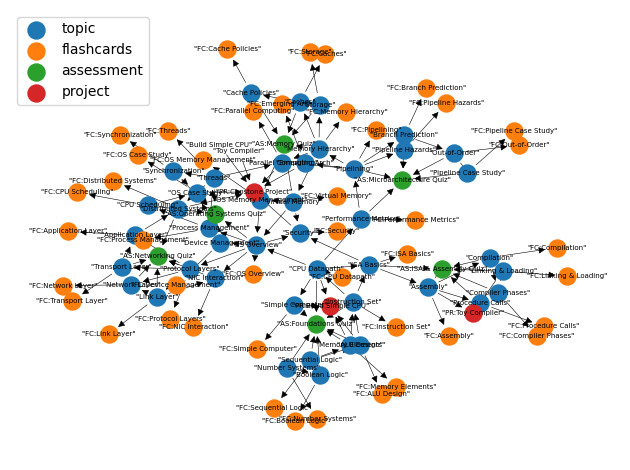

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_graphml("computer_arch_curriculum.graphml")

quoted = nx.relabel_nodes(G, {n: f'"{n}"' for n in G.nodes()}, copy=True)
try:
    pos = graphviz_layout(quoted, prog="dot")
except Exception:
    # pos = nx.spring_layout(quoted)
    pos = nx.nx_agraph.graphviz_layout(quoted)
    # pos = nx.bfs_layout(quoted)
    # pos = nx.kamada_kawai_layout(quoted)
type_colors = {
    "topic": "#1f77b4",
    "flashcards": "#ff7f0e",
    "assessment": "#2ca02c",
    "project": "#d62728",
}
for t, c in type_colors.items():
    nx.draw_networkx_nodes(
        quoted,
        pos,
        nodelist=[n for n, d in quoted.nodes(data=True) if d.get("type") == t],
        node_color=c,
        node_size=150,
        label=t,
    )
nx.draw_networkx_edges(quoted, pos, arrows=True, arrowstyle="-|>", width=0.4)
nx.draw_networkx_labels(quoted, pos, font_size=5)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.tight_layout()
plt.show()

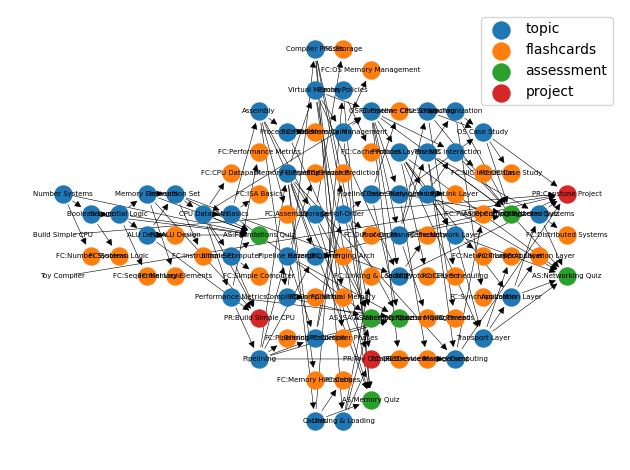

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Load graph
G = nx.read_graphml("computer_arch_curriculum.graphml")

# Check for cycles
if not nx.is_directed_acyclic_graph(G):
    raise ValueError("Graph is not a DAG, cannot compute topological layout.")

# Add topological layer to each node
for layer, nodes in enumerate(nx.topological_generations(G)):
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Use multipartite_layout based on topological "layer"
pos = nx.multipartite_layout(G, subset_key="layer")

# Optional: quote node names if needed
# quoted = nx.relabel_nodes(G, {n: f'"{n}"' for n in G.nodes()}, copy=True)

# Define node type color mapping
type_colors = {
    "topic": "#1f77b4",
    "flashcards": "#ff7f0e",
    "assessment": "#2ca02c",
    "project": "#d62728",
}

# Draw nodes by type
for t, c in type_colors.items():
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[n for n, d in G.nodes(data=True) if d.get("type") == t],
        node_color=c,
        node_size=150,
        label=t,
    )

# Draw edges and labels
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle="-|>", width=0.4)
nx.draw_networkx_labels(G, pos, font_size=5)

# Final layout and plot
plt.legend(scatterpoints=1)
plt.axis("off")
plt.tight_layout()
plt.show()